<a href="https://colab.research.google.com/github/qnrua0511/bikeseoul/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

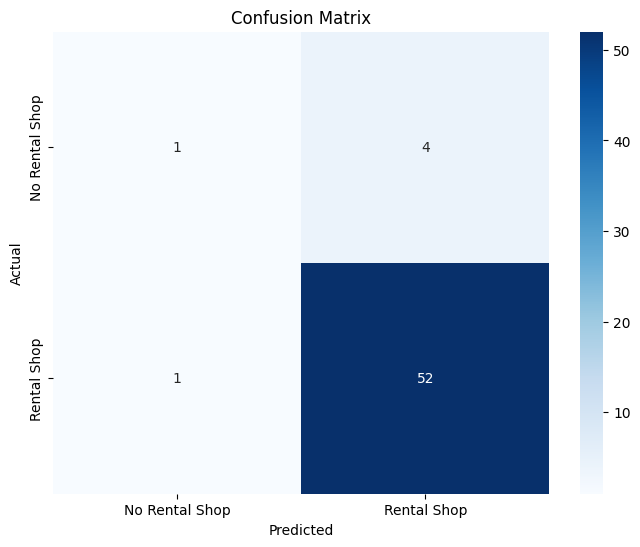

                precision    recall  f1-score   support

No Rental Shop       0.50      0.20      0.29         5
   Rental Shop       0.93      0.98      0.95        53

      accuracy                           0.91        58
     macro avg       0.71      0.59      0.62        58
  weighted avg       0.89      0.91      0.90        58



In [7]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 불러오기
subway_df = pd.read_csv('subway.csv')
rental_shop_df = pd.read_csv('rental_shop_add.csv', encoding='cp949')

# 필요한 칼럼만 선택
subway_df = subway_df[['역명', '위도', '경도']]
rental_shop_df = rental_shop_df[['대여소명', '위도', '경도']]

# 결측치 제거
subway_df.dropna(inplace=True)
rental_shop_df.dropna(inplace=True)

# 지하철역 근처에 대여소가 있는지 여부 판단 함수
def is_nearby(subway_lat, subway_lon, rental_lat, rental_lon, threshold=0.5):
    distance = geodesic((subway_lat, subway_lon), (rental_lat, rental_lon)).km
    return distance <= threshold

# 각 지하철역에 대해 근처에 대여소가 있는지 여부를 판단하여 새로운 칼럼 추가
subway_df['대여소_근처'] = subway_df.apply(
    lambda row: any(is_nearby(row['위도'], row['경도'], r_lat, r_lon) for r_lat, r_lon in zip(rental_shop_df['위도'], rental_shop_df['경도'])),
    axis=1
)

# 특성(X)과 라벨(y) 정의
X = subway_df[['위도', '경도']]
y = subway_df['대여소_근처'].astype(int)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류기 정의 및 학습
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)
# 혼동행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rental Shop', 'Rental Shop'], yticklabels=['No Rental Shop', 'Rental Shop'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 출력
print(classification_report(y_test, y_pred, target_names=['No Rental Shop', 'Rental Shop']))

랜덤 포레스트 분류

- 랜덤 포레스트가 조정을 안해도 어느 정도 성능이 좋게 나오기에 랜덤 포레스트 분류 사용

해석

- Rental Shop의 정밀도가 0.93으로 잘 예측함

- 하지만, No Rental Shop의 경우 데이터의 수가 적어 잘 예측하지 못함

- 데이터의 수가 적다는 것은 대부분의 지하철 역에는 대여소가 있기 때문임

=> 이를 통해 지하철역 근처에는 대여소가 대부분 있다는 것을 확인 할 수 있음

